# Import Libraries

In [187]:
#Importing Libraries

import pandas as pd #pandas to create small dataframes 
import matplotlib.pylab as plt #Plotting
from matplotlib import pyplot
import numpy as np  #Do aritmetic operations on arrays
import plotly.graph_objects as go #Graphing library. 
from datetime import datetime, timedelta #The datetime module supplies classes for manipulating dates and times.
import plotly
import plotly.graph_objs as go
from plotly.offline import *
import warnings
warnings.filterwarnings("ignore")
import statistics
from statistics import mean 
# Show all columns
pd.options.display.max_columns = None

## Import csv

In [25]:
df1 = pd.read_csv("data/new_train.csv")

In [26]:
df2 = pd.read_csv("data/new_test.csv")

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Columns: 148 entries, channelGrouping to visitStartTime
dtypes: bool(1), float64(9), int64(6), object(132)
memory usage: 1.9+ GB


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401589 entries, 0 to 401588
Columns: 147 entries, channelGrouping to visitStartTime
dtypes: bool(1), float64(8), int64(7), object(131)
memory usage: 447.7+ MB


In [29]:
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2109926 entries, 0 to 2109925
Columns: 148 entries, channelGrouping to visitStartTime
dtypes: bool(1), float64(9), int64(6), object(132)
memory usage: 2.3+ GB


In [8]:
df["date"] = pd.to_datetime(df["date"], infer_datetime_format=True, format="%Y%m%d")
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'])

In [9]:
# fill with zero
df.fillna({'totals_transactionRevenue': 0, 'totals_transactions': 0, 'trafficSource_adwordsClickInfo_page': 0,
          'totals_bounces': 0, 'totals_newVisits': 0, 'hits_promoIsClick': False, 
          'trafficSource_isTrueDirect': False, 'hits_transactionCoupon': 'None', 
          'trafficSource_adContent': 'None', 'trafficSource_adwordsClickInfo_adNetworkType': 'None',
          'trafficSource_adwordsClickInfo_slot': 'None', 'trafficSource_keyword': '(not provided)',
          'totals_sessionQualityDim': 1}, inplace=True)

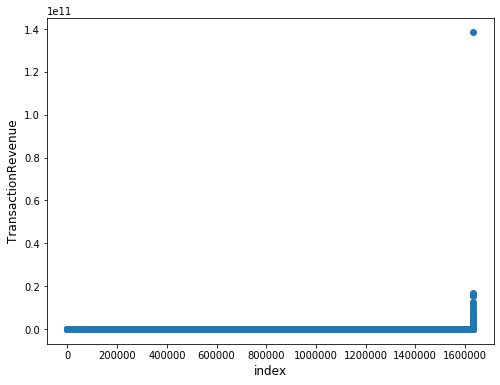

In [35]:
rev_by_ID = df.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(rev_by_ID.shape[0]), np.sort((rev_by_ID["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [31]:
len(df.loc[df['totals_transactionRevenue'] > 0])

23108

In [32]:
len(df)

2109926

In [34]:
df['totals_transactionRevenue'].max()/1000000

30169.94

## by Country

### Visits

In [10]:
tmp = df['geoNetwork_country'].value_counts()
country_visits = pd.DataFrame(data={'geoNetwork_country': tmp.values}, index=tmp.index).reset_index()
country_visits.columns = ['Country', 'Visits']

In [11]:
# colormap = Rainbow, Greens or GnBu
def plot_country_map(data, location, z, legend, title, colormap='GnBu'):
    data = dict(type = 'choropleth', 
                colorscale = colormap,
                autocolorscale = False,
                reversescale = False,
               locations = data[location],
               locationmode = 'country names',
               z = data[z], 
               text = data[z],
               colorbar = {'title':legend})
    layout = dict(title = title, 
                 geo = dict(showframe = True, 
                         projection = {'type': 'natural earth'}))
    choromap = go.Figure(data = [data], layout=layout)
    iplot(choromap)

In [233]:
# Most visits are from the USA
plot_country_map(country_visits, 'Country', 'Visits', 'Visits', 'Visits per country')

## Geschwindigkeit

"**hits_pageLoadTime**" = The total time (in milliseconds) for loading the page - from the beginning of the page view (e.g. by clicking on a page link) to the end of the loading process for the page in the browser.

In [224]:
filtered_df = df[df['hits_pageLoadTime'].notnull()]

In [225]:
filtered_df.to_csv('filtered_df.csv', index=False)

In [226]:
df3 = pd.read_csv("filtered_df.csv", converters={'hits_pageLoadTime': eval})

In [227]:
def valuation_formula(x):
    return  mean(list(map(int, x)))
df3['mean_loadtime'] = df3.apply(lambda row: valuation_formula(row['hits_pageLoadTime']), axis=1)

In [228]:
df_country_mean = df3.groupby('geoNetwork_country').mean().reset_index()
df_country_count = df3.groupby('geoNetwork_country').count().reset_index()

In [229]:
df_country = pd.DataFrame()
df_country['country'] = df_country_mean['geoNetwork_country']
df_country['load_time'] = df_country_mean['mean_loadtime']
df_country['load_count'] = df_country_count['mean_loadtime']

In [230]:
#df_country100 = df_country.sort_values(by='load_count', ascending=False)

In [231]:
df_country100 = df_country.loc[df_country['load_count'] > 100]

In [232]:
len(df_country100)

31

In [234]:
df_country100

,country,load_time,load_count
6,Argentina,10151.924718,114
8,Australia,8025.755656,318
15,Belgium,5626.506211,111
19,Brazil,9829.490778,375
24,Canada,5230.542661,630
27,Colombia,7985.239331,110
43,France,5480.553449,374
45,Germany,7208.738077,438
54,Hong Kong,8510.830302,109
57,India,13619.813956,1204


In [36]:
tmp = df['geoNetwork_country'].value_counts()
country_visits = pd.DataFrame(data={'geoNetwork_country': tmp.values}, index=tmp.index).reset_index()
country_visits.columns = ['Country', 'Visits']

In [37]:
# colormap = Rainbow, Greens or GnBu
def plot_country_map(data, location, z, legend, title, colormap='GnBu'):
    data = dict(type = 'choropleth', 
                colorscale = colormap,
                autocolorscale = False,
                reversescale = False,
               locations = data[location],
               locationmode = 'country names',
               z = data[z], 
               text = data[z],
               colorbar = {'title':legend})
    layout = dict(title = title, 
                 geo = dict(showframe = True, 
                         projection = {'type': 'natural earth'}))
    choromap = go.Figure(data = [data], layout=layout)
    iplot(choromap)

In [38]:
# Most visits are from the USA
plot_country_map(country_visits, 'Country', 'Visits', 'Visits', 'Visits per country')

## Transactions by day

In [13]:
# Transactions by time
date_sum = df.groupby('date')['totals_transactionRevenue'].count().to_frame().reset_index()
# Plot
trace_train = go.Scatter(x = pd.to_datetime(date_sum.date.astype(str)),
                        y=date_sum['totals_transactionRevenue'],opacity=0.8)

layout = dict(
    title= "Transactions by date",
    xaxis=dict(rangeslider=dict(visible=True), type='date'))
fig = dict(data= [trace_train], layout=layout)
iplot(fig)

In [14]:
# Revenue by time
date_sum = (df.groupby('date')['totals_transactionRevenue'].sum()/1000000).to_frame().reset_index()
# Plot
trace_train = go.Scatter(x = pd.to_datetime(date_sum.date.astype(str)),
                        y=date_sum['totals_transactionRevenue'],opacity=0.8)

layout = dict(
    title= "Revenue by date in $",
    xaxis=dict(rangeslider=dict(visible=True), type='date'))
fig = dict(data= [trace_train], layout=layout)
iplot(fig)